<a href="https://colab.research.google.com/github/sammothxc/math215-w24/blob/main/labs/SVD_and_image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lab 13 - Singular value decompositions and image compression**

Enter your code in the spaces provided. Do not change any of the variable names or function names that are already provided for you. In places where we specify the name of the return value, make sure that your code produces the a value with the correct name.

In [51]:
# Do not edit this cell.

LabID="Lab13"

try:
  from graderHelp import ISGRADEPLOT
except ImportError:
  ISGRADEPLOT = True

**Enter your name, section number, and BYU NetID**

In [52]:
# Enter your first and last names in between the quotation marks.

first_name="Sam"

last_name="Warr"

# Enter your Math 215 section number in between the quotation marks.

section_number="01"

# Enter your BYU NetID in between the quotation marks.  NOT YOUR BYU ID NUMBER!

BYUNetID="warrior8"

**Import the required packages**

In [53]:
import numpy as np
import matplotlib.pyplot as plt

**Problem 1**

In [54]:
# This function accepts integers m and n, and an array of singular values s and returns the Sigma matrix.

def sigma(m,n,s):
  x = np.zeros((m,n))
  for i in range(len(s)):
    x[i,i] = s[i] 
  return x

**Problem 2**

In [55]:
# This function accepts arrays u,s, and v_t, and returns the corresponing array A.

def reconstructed_array(u,s,v_t):
  A = u@sigma(len(u[0,:]),len(v_t[:,0]),s)@v_t
  return A

**Problem 3**

In [56]:
# This function accepts an array A and an integer k, and returns a rank k approximation of A as computed by an SVD.

def lower_rank(A,k):
  u,s,v_t = np.linalg.svd(A)
  u_k = u[:,:k]
  s_k = sigma(len(u[0,:]),len(v_t[:,0]),s)[:k,:k]
  v_k = v_t[:k,:]
  A_k = u_k@s_k@v_k
  return A_k

**Downloading image data**

The simplest way to load the image into Colab is to first download it as a .png file to your local computer by clicking the link

https://drive.google.com/uc?export=download&id=1hlAEhTsqfvYX3aGFgRgFJF_gO-U5c0gH

This will allow you to download the image as a .png file.  In the top left corner of this screen you should see a little file folder icon.   Selecting it opens a new window to the left of the notebook with three tabs: "Upload", "Refresh", and "Mount Drive". Select "Upload".  This should bring up a window that allows you to select the file "Lab13Image.png" from your local machine, which will upload the file to your notebook.  You will need to do this again if you decide to close your notebook and reopen it at a later time.

**Import the image and convert it to an array**

The following cell imports the png image and creates two arrays.  The first array is a 3-dimensional array, which you can think of as three matrices, each of which describes one of three colors for the image (red, green, and blue).  The second line of the cell converts the image to grayscale, which can be represented by a single matrix, whose entries range between 0 and 1 and represent how dark or bright the corresponding pixel should be.

In [57]:
import skimage
from skimage import io

RGB_array = io.imread('Lab13Image.png')
gray_array=skimage.color.rgb2gray(skimage.color.rgba2rgb(RGB_array))

The following functions can be used to display the color image and grayscale image respectively.

IMPORTANT NOTE: The auto-grading website will give you an error message if the file you submit contains calls to either of these functions. You can leave the function definitions for show_color and show_gray here, but make sure to delete any calls to these functions before you submit your lab for grading. (You can also copy them to your practice notebook to use them there.)

In [58]:
def show_color(array):
  plt.figure(figsize=(10,10))
  plt.grid(None)
  plt.imshow(array)
  return None

def show_gray(array):
  plt.figure(figsize=(10,10))
  plt.grid(None)
  plt.imshow(array,cmap='gray',vmin=0,vmax=1)
  return None

 **Problem 4**

In [59]:
# Save the value you obtain in Problem 4 as the variable original_size.

original_size=gray_array.shape[0] * gray_array.shape[1]

**Problem 5**

In [60]:
# Place your plot for Problem 5 here.



**Problem 6**

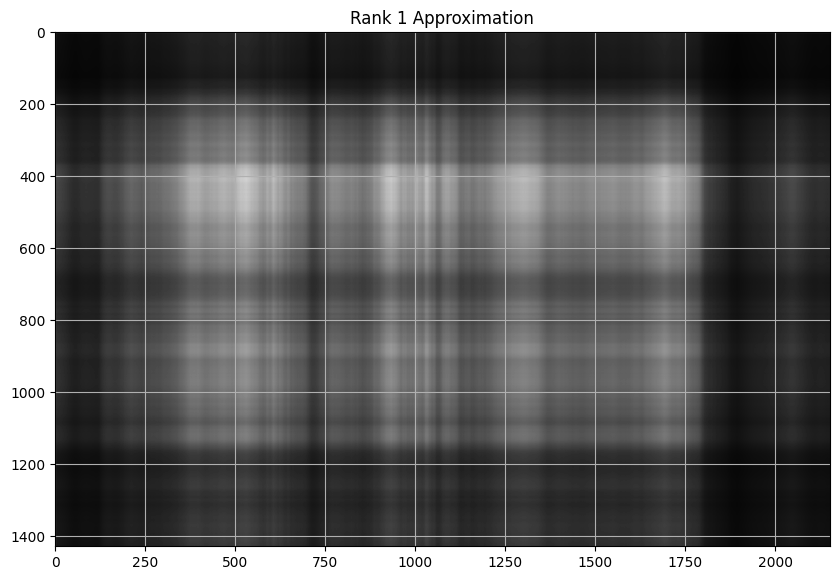

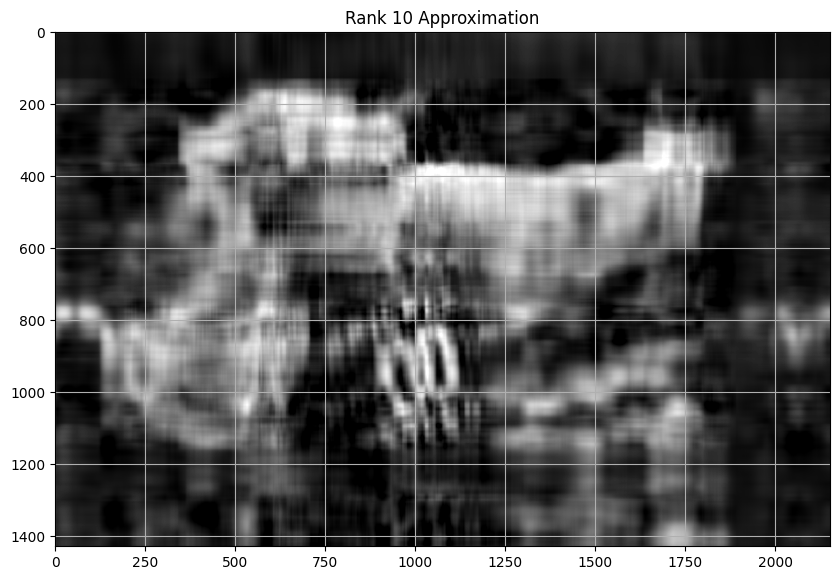

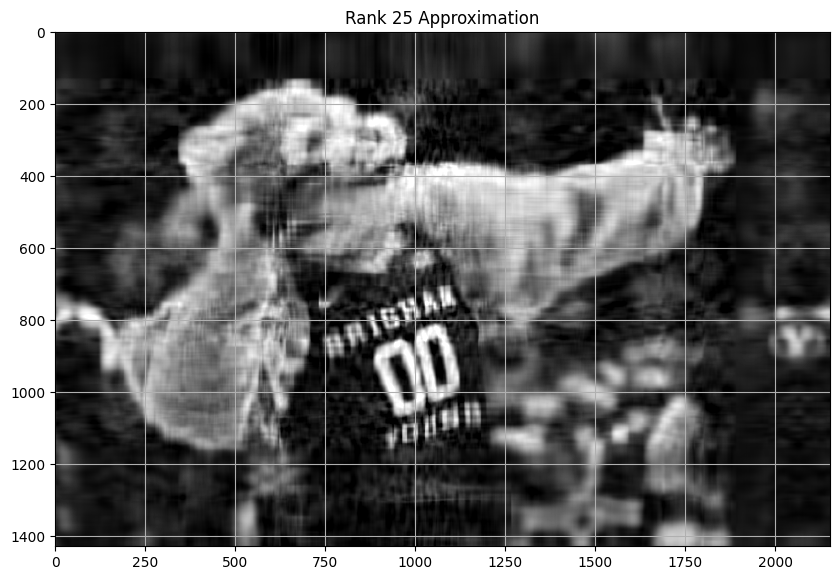

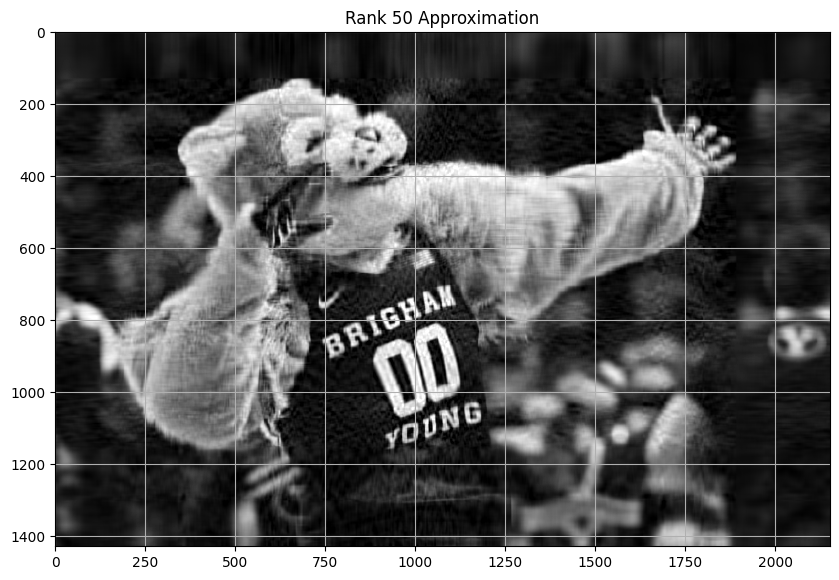

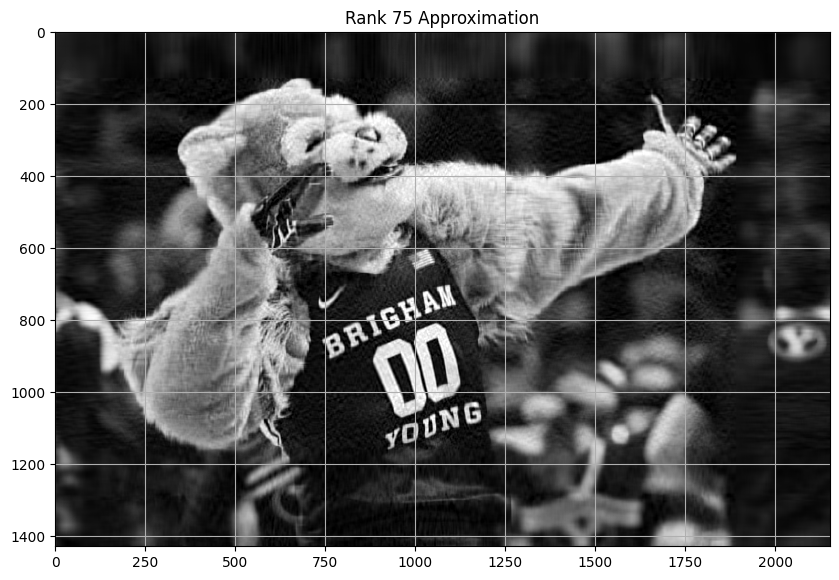

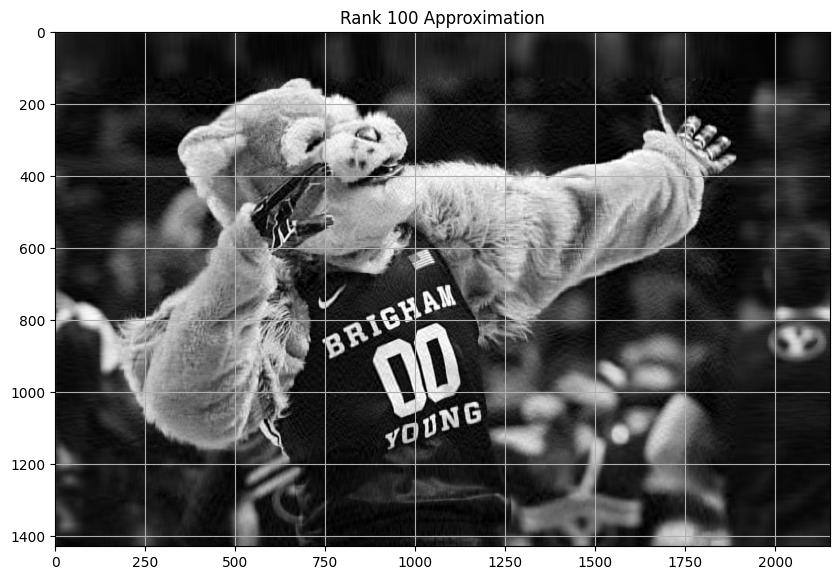

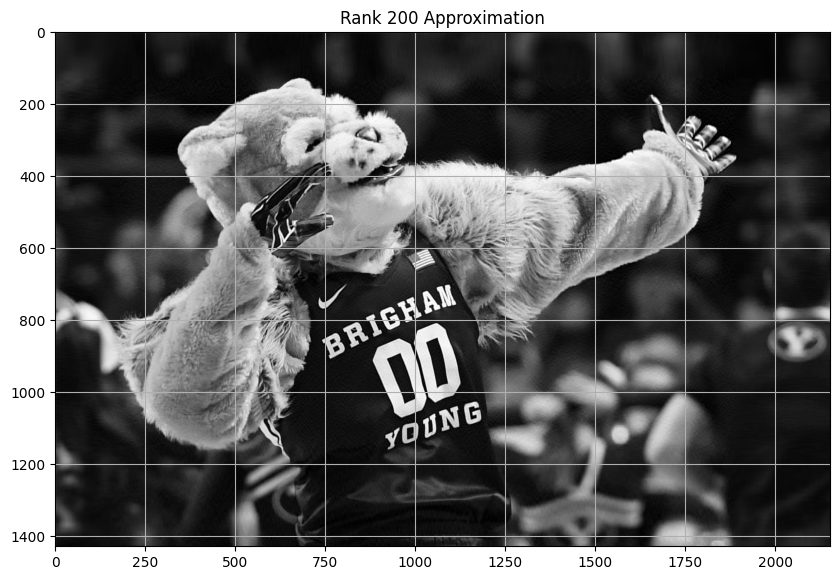

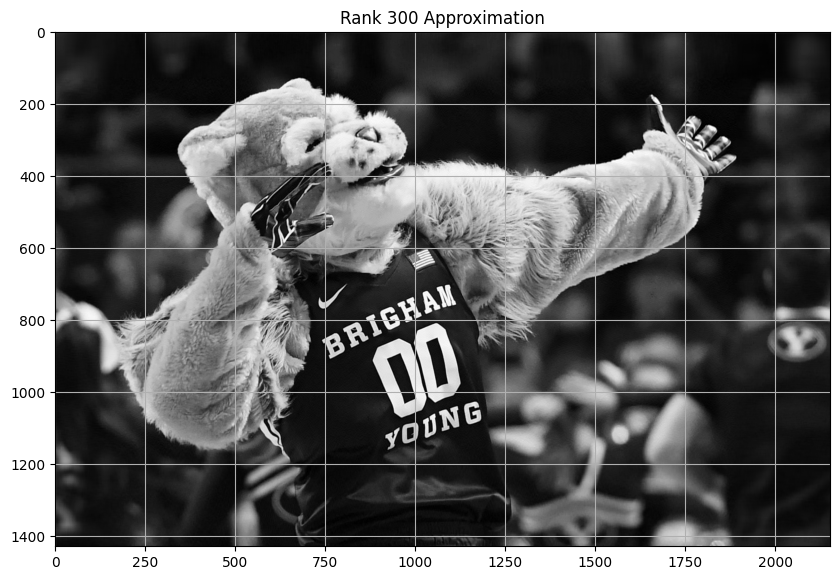

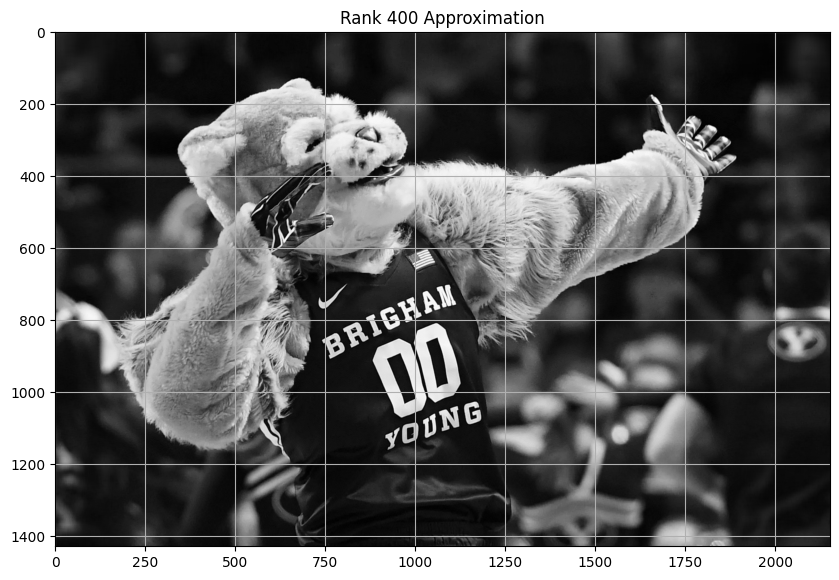

In [61]:
# Save the value you obtain in Problem 6 as the variable min_rank.

# List of k values to consider
k_values = [1, 10, 25, 50, 75, 100, 200, 300, 400]

# Dictionary to store the mean squared error for each k
mse_dict = {}

# Compute and display rank k approximations
for k in k_values:
    # Compute rank k approximation
    gray_approximation = lower_rank(gray_array, k)
    
    # Display the approximation
    show_gray(gray_approximation)
    plt.title(f"Rank {k} Approximation")
    plt.show()
    
    # Compute mean squared error between original and approximation
    mse = np.mean((gray_array - gray_approximation) ** 2)
    mse_dict[k] = mse

# Find the smallest value of k with acceptable quality
acceptable_mse = 0.01 * mse_dict[1]  # Define acceptable MSE threshold
min_rank = min(k for k, mse in mse_dict.items() if mse <= acceptable_mse)


**Problem 7**

In [62]:
# Save the values you obtain in Problem 7 as the variables rank_100_size and relative_size.

u, s, vt = np.linalg.svd(gray_array)

u_100 = u[:, :100]
s_100 = np.diag(s[:100])
vt_100 = vt[:100, :]
A_100 = u_100 @ s_100 @ vt_100

rank_100_size = np.prod(u_100.shape) + np.prod(vt_100.shape) + 100

relative_size = rank_100_size / original_size


**STOP!  BEFORE YOU SUBMIT THIS LAB:**  Go to the "Runtime" menu at the top of this page, and select "Restart and run all".  If any of the cells produce error messages, you will either need to fix the error(s) or delete the code that is causing the error(s).  Then use "Restart and run all" again to see if there are any new errors.  Repeat this until no new error messages show up.  

**You are not ready to submit until you are able to select "Restart and run all" without any new error messages showing up.  Your code will not be able to be graded if there are any error messages.**

To submit your lab for grading you must first download it to your compute as .py file. In the "File" menu select "Download .py". The resulting file can then be uploaded to [gradescope.com](https://gradescope.com) for grading.